<a href="https://colab.research.google.com/github/Mang9ae/AI_Aplication/blob/main/easyocr_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. easyocr 사용 / 설치 진행**
- easyocr : 다양한 언어의
텍스트를 이미지에서 인식하는 데 특화된 라이브러리

In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 868.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

# **2. 한국어 설정**
- 라이브러리를 파이썬 스크립트로 가져와 한국어 모델을 사용하여 텍스트를 인식하도록 설정

In [2]:
import easyocr
reader = easyocr.Reader(['ko'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

# **3. 필요한 라이브러리 가져오기**
- easyocr : 이미지에서 텍스트를 인식하는 핵심 라이브러리
- matplotlib.pyplot as plt : 데이터를 시각화하는 데 사용하는 라이브러리 / 바운딩 박스 그리는 데 사용
- matplotlib.image as mpimg : 이미지 파일을 읽고 처리하는 데 사용
- matplotlib.patches as patches : 이미지 위에 도형을 그리는데 사용 / 비운딩 박스 그리는 데 사용
- from google.colab import files : 코랩 환경에서 파일을 업로드하고 다운로드 하는 기능을 제공
- import io : 메모리 상의 데이터(업로드 된 이미지) 다루는 데 사용
- from PIL import Image : 다양한 이미지 파일 형식을 처리하는 데 사용

In [3]:
import easyocr
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from google.colab import files
import io
from PIL import Image

# **4. 파일 업로드 UI 표시**
- 파일 선택창을 사용자에게 보여줌 / 사용자는 이 창을 통해 하나 이상의 이미지 파일을 선택하여 업로드 가능
- 파일 정보는 uploaded 변수에 저장

In [4]:
uploaded = files.upload()

Saving handWrite5.png to handWrite5.png
Saving textWrite.jpg to textWrite.jpg


# **5. 업로드된 각 파일에 대해 OCR 수행 및 결과 표시**
- for filename in uploaded.keys() : 업로드된 파일들의 이름(키)를 순회하며 각 파일에 대해 작업을 수행
- try ... except Exception as e : 오류가 발생하더라도 프로그램이 멈추지 않고 진행되도록 에외 처리

---


**이미지 파일 읽기**
- image_byte = uploaded[filename] : 현재 처리 중인 파일의 내용을 byte 형태로 가져옴
- image = Image.open(io.BytesIO(image_bytes)).convert('RGB') : 바이트 형태의 이미지 데이터를 PIL 라이브러리 사용하여 이미지 객체로 변환 / RGB 색상 모드로 변환하여 일관성 유지
- img = mpimg.pil_to_array(image) : PIL 이미지 객체를 matplotlib이 처리할 수 있는 NumPy 배열 형태로 변환
- print(f"\n--- OCR 결과: {filename} ---"): 현재 처리 중인 파일 이름을 출력하여 진행상황 보고


---

**OCR 수행**
- results = reader.readtext(img) : OCR 수행 부분 / reader 객체의 readtext() 메서드를 사용하여 이미지(img)에서 텍스트를 인식 > 인식 결과는 리스트 형태로 반환, 각 요소는 튜플 (bbox, text, prob)로 구성
- bbox : 인식된 텍스트 영역의 바운딩 박스 좌표 (좌상단, 우상단, 우하단, 좌하단 순서의 튜플)
- text : 인식된 텍스트 문자열
- prob : 인식된 텍스트의 정확도 (0과 1 사이의 값)

---

**시각화를 위한 Matplotlib 설정**
- fig, ax = plt.subplots(1, 1, figsize=(15, 15)) : 새로운 그림(figure)과 하나의 서브플롯(axes)을 생성 / figsize는 그림의 크기를 지정
- ax.imshow(img) : 원본 이미지를 서브플롯에 표시
- ax.set_title(filename ): 서브플롯의 제목을 현재 파일 이름으로 설정


---

**인식 결과 및 바운딩 박스 그리기**
- for (bbox, text, prob) in results: : OCR 결과 리스트를 순회하며 각 인식된 텍스트 정보에 접근
1. 바운딩 박스 좌표 추출
  - (tl, tr, br, bl) = bbox : 바운딩 박스 좌표 튜플을 각 꼭지점의 좌표로 언패킹(top-left, top-right, bottom-right, bottom-left)
  - tl = (int(tl[0]), int(tl[1])), br = (int(br[0]), int(br[1])) : 바운딩 박스 좌표를 정수형으로 변환
  - width = br[0] - tl[0], height = br[1] - tl[1] : 바운딩 박스의 너비와 높이를 계산
2. 바운딩 박스 그리기
  - rect = patches.Rectangle(tl, width, height, linewidth=2, edgecolor='red', facecolor='none') : 인식된 텍스트 영역을 나타내는 빨간색 테두리의 투명한 사각형(Rectangle) 객체를 생성
  - ax.add_patch(rect) : 생성된 사각형을 서브플롯에 추가하여 이미지 위에 표시
3. 인식된 텍스트 표시
  - ax.text(tl[0], tl[1] - 10, text, fontsize=12, bbox=dict(facecolor='yellow', alpha=0.8)) : 인식된 텍스트를 바운딩 박스 바로 위에 노란색 배경으로 표시 / fontsize는 텍스트 크기를, bbox는 텍스트 주변의 상자 스타일을 설정
  - print(f"텍스트: {text}, 정확도: {prob:.2f}") : 인식된 텍스트와 정확도를 콘솔에 출력


---


**그래프 표시**
- plt.show() : 현재까지 그린 그림(이미지와 바운딩 박스, 텍스트)을 화면에 표시


---

- print("\n모든 파일 처리 완료.") : 모든 파일 처리가 완료되었음을 알리는 메시지를 출력


--- OCR 결과: handWrite5.png ---
텍스트: 배화여자 대학교, 정확도: 0.77
텍스트: 2025200111, 정확도: 0.98
텍스트: 김민서, 정확도: 0.34


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

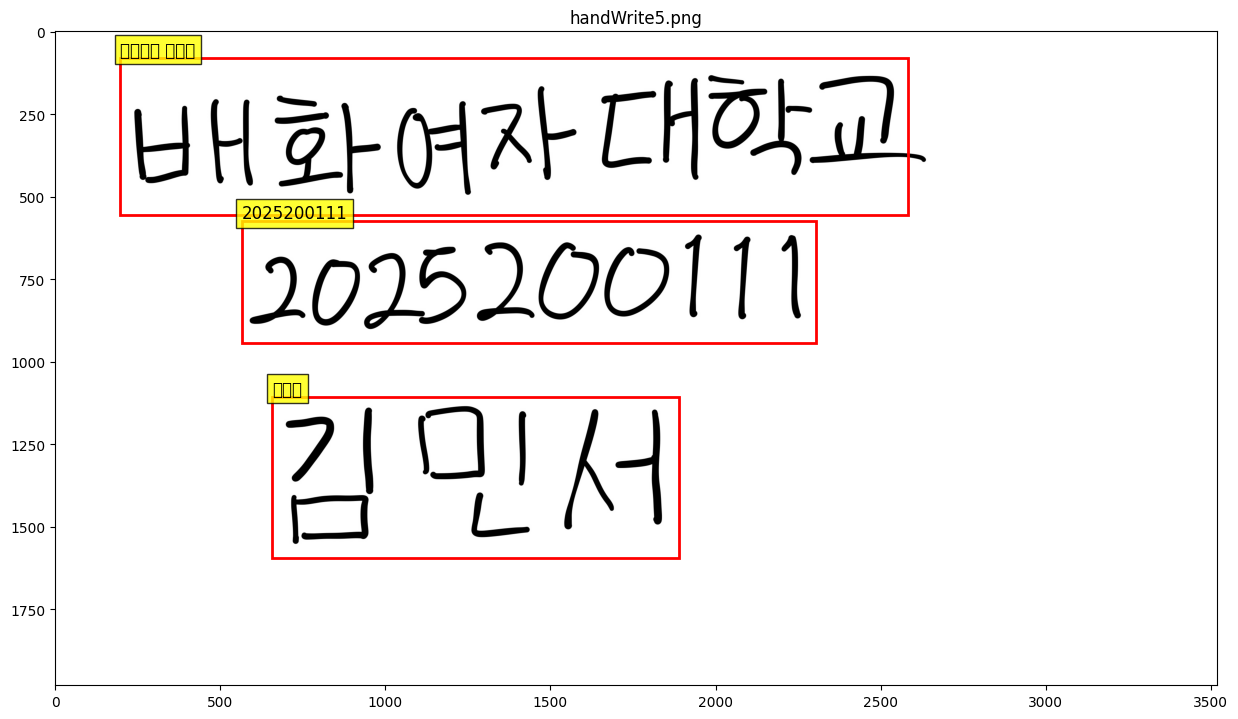


--- OCR 결과: textWrite.jpg ---
텍스트: 배화여자대학교, 정확도: 1.00
텍스트: 2025200111, 정확도: 0.86
텍스트: 김민서, 정확도: 0.99
텍스트: 안녕하세요, 정확도: 1.00


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45397 (\N{HANGUL SYLLABLE NYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


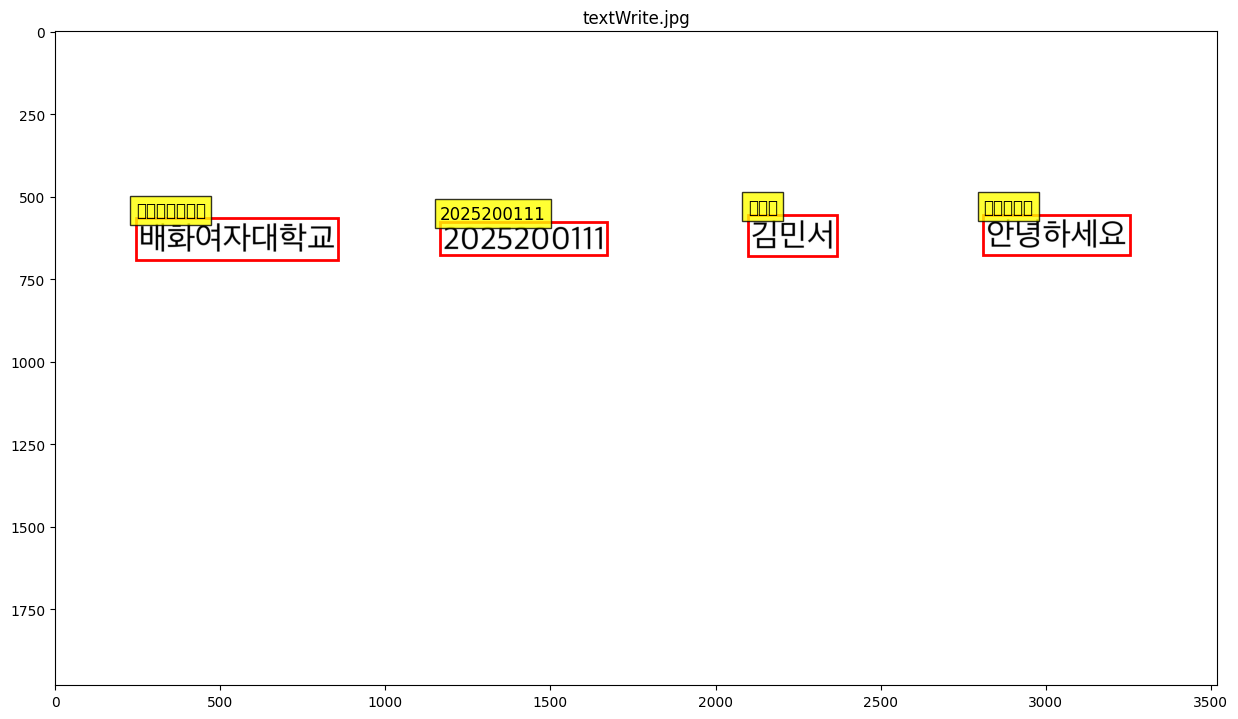


모든 파일 처리 완료.


In [5]:
for filename in uploaded.keys():
    try:
        # 이미지 파일 읽기
        image_bytes = uploaded[filename]
        image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
        img = mpimg.pil_to_array(image)

        print(f"\n--- OCR 결과: {filename} ---")

        # OCR 수행
        results = reader.readtext(img)

        # 시각화를 위한 Matplotlib 설정
        fig, ax = plt.subplots(1, 1, figsize=(15, 15))
        ax.imshow(img)
        ax.set_title(filename)  # 이미지 제목 설정

        # 인식 결과 및 바운딩 박스 그리기
        for (bbox, text, prob) in results:
            # 바운딩 박스 좌표 추출
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            br = (int(br[0]), int(br[1]))
            width = br[0] - tl[0]
            height = br[1] - tl[1]

            # 바운딩 박스 그리기
            rect = patches.Rectangle(tl, width, height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

            # 인식된 텍스트 표시
            ax.text(tl[0], tl[1] - 10, text, fontsize=12, bbox=dict(facecolor='yellow', alpha=0.8))
            print(f"텍스트: {text}, 정확도: {prob:.2f}")

        # 그래프 표시
        plt.show()

    except Exception as e:
        print(f"Error processing file {filename}: {e}")

print("\n모든 파일 처리 완료.")